# Traveling and Standing Waves

We've been discussing sound waves as traveling waves. Let's see how we can move from plotting static waves to traveling waves. We'll then add two identical traveling waves that travel in opposite directions to see the origin of standing waves. Standing waves, of course, depend on boundary conditions.  Finally, we'll assume a collection of harmonic standing waves occur in a confined region of space and see how they combine.

## Animating a Plot with Matplotlib
Matplotlib has a library in matplotlib.animation called FuncAnimation. It allows one to animate a the plotting on a graph. What we want to do is plot arrays point-by-point and plot arrays as a function of time. This library has the capability to act like an oscilloscope too.

### First import some good stuff

In [1]:
%matplotlib inline
# Enable interactive plot
%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (8, 5)

## Static plotting
Here is a typical static plot using `matplotlib.pyplot`. We can add decorations like axis labels and gridlines as shown below. We first need to define an array of `x` and `y` values using `numpy`. Numbers like $\pi$ can be had from `numpy` using `np.pi`, and function using `np.sin`. Trigonometric functions require radian units. Below, we plot

$$y = \sin\left(kx\right)$$

<IPython.core.display.Javascript object>


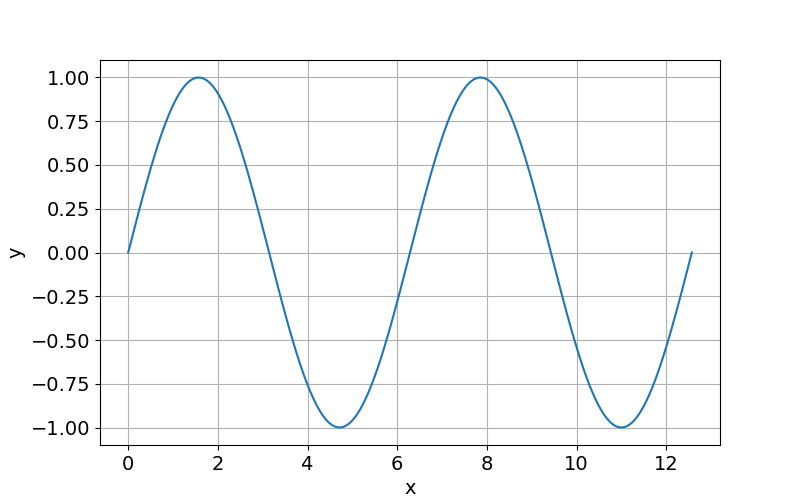

In [2]:
#create a list of x values from xi=0 to xf=4 pi with npts=200 points.
xi = 0
xf = 4*np.pi
npts = 200
x = np.linspace(xi, xf, npts)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

## Point-by-Point Animated Plotting
Here is an example of plotting arrays point-by-point using the `x` and `y` we defined in the previous example.This works by copying portions of the `x` and `y` array. Below, `FuncAnimate` will run the function `animate` 200 times (the number of points in our arrays). Each time it runs, it creates a frame number starting at 0 and going to 199. This frame number is used to copy `x` and `y` values from the beginning up to the frame number. The first iteration, it copies the first points. The second iteration, it copies the first two points. Each time, it graphs the subset of points. Since the subset grows by one point each iteration, it plots one more point each iteration. This gives the appearance of the function growing across the graph in an animated way. You can change the rate by altering `interval`. You can make it repeat by changing it to `repeat=True`. I recommend returning it to `False` and running it before moving on to the next activity. Otherwise, your computer will slow down from trying to continue running this animation.

We are still plotting

$$y = \sin\left(kx\right)$$

We are plotting it one (more) point at a time.

<IPython.core.display.Javascript object>


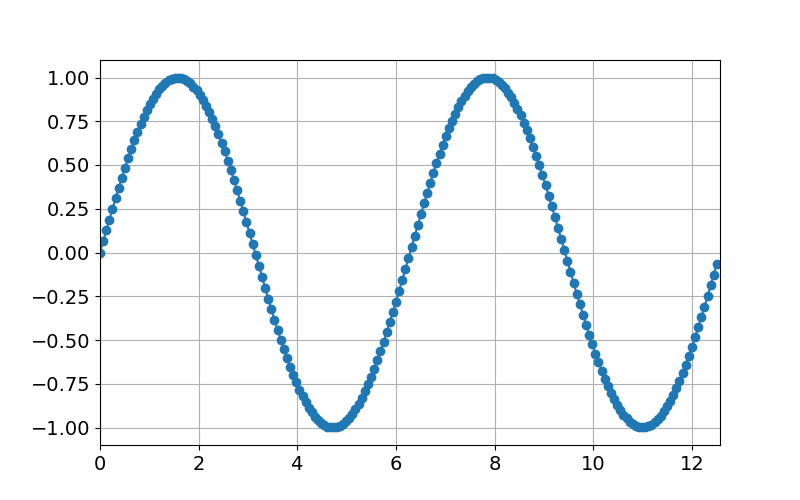

In [3]:
fig, ax = plt.subplots()

line, = ax.plot([],'-o')

ax.set_xlim(0, 4*np.pi)
ax.set_ylim(-1.1, 1.1)
#ax.plot(x, y, '-b')

def animate(frame_num):
    xx = x[0:frame_num]
    yy = y[0:frame_num]
    line.set_data((xx, yy))
    return line

anim = FuncAnimation(fig, animate, frames=npts, interval=100, repeat=False)
plt.grid(True)
plt.show()

## Oscilloscope Mode Animation
We can also plot a function and have it move through time as if we were measuring the wave as it passes us. This works by creating a function with a time-dependent phase shift $\omega t$. The function we are plotting now is

$$y\left(x, t\right) = \sin\left(kx \pm \omega t\right)$$

For our example, $k=1$. What does this make $\lambda$? We are also using $\omega = 2\pi$. The time-dependence is handled in a similar manner as the point-by-point plotting above. In this case, we plot the entire function at a particular time $t$, starting from $t=0$ because the first `frame_num` is zero. The next iteration of `FuncAnimate` adds a small $\Delta t$ using the frame number and the total number of frames.

$$\Delta t = \frac{frame}{npts}$$

This shifts the wave left or right depending on the chosen $\pm$. Run the animation below. Then, change the $\pm$ to verify the wave travels in the direction you expect. You can uncomment the line `ax.plot(x, np.sin(x))` if you want to see the $t=0$ reference.

<IPython.core.display.Javascript object>


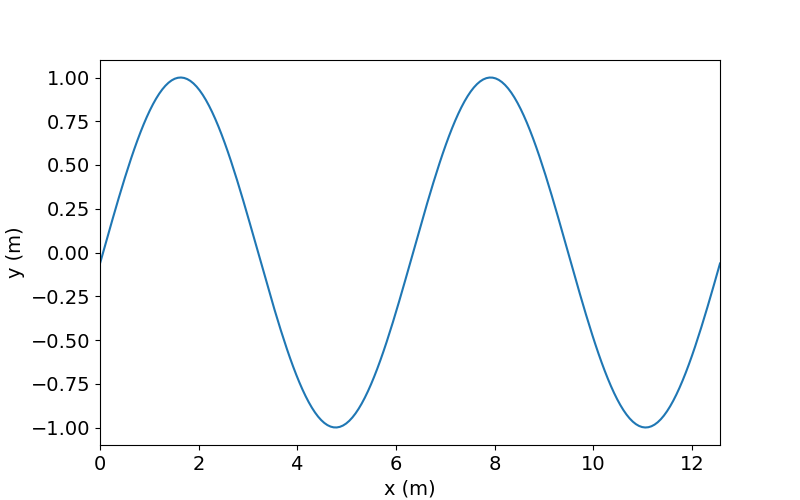

In [4]:
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_xlim(0, 4*np.pi)
ax.set_ylim(-1.1, 1.1)
#ax.plot(x, np.sin(x)) #wave at t=0

def animate2(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/npts)
    line.set_data((x,y))
    return line

anim = FuncAnimation(fig, animate2, frames=npts+1, interval=5, repeat=False)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

### Standing Wave
If we create two waves of the same wavelength traveling in opposite directions, we will see that they add together to create a standing wave. In the code below, use the animate function above as a guide
* Fill in the math of creating a wave traveling to the right and then adding a wave traveling to the left.
* What happens when the $\omega$ of one traveling wave is different than the other?
* What happens when the $k$ of one traveling wave is different than the other?

<IPython.core.display.Javascript object>


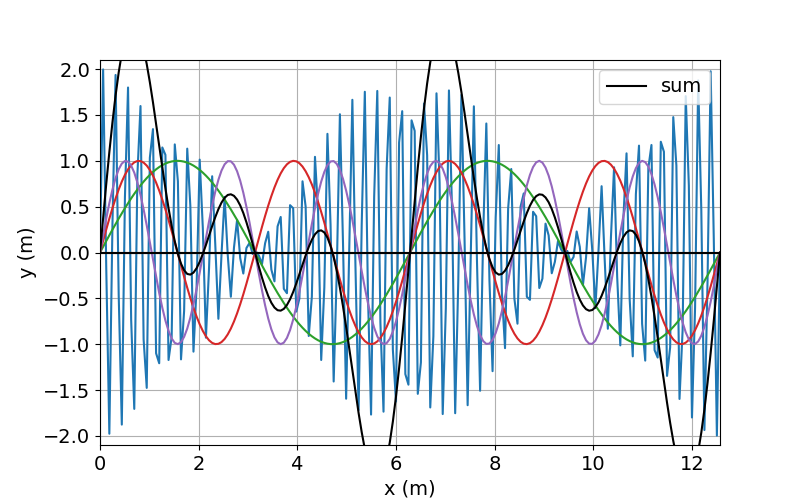

In [15]:
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_xlim(0, 4*np.pi)
ax.set_ylim(-2.1, 2.1)
#ax.plot(x, np.sin(x))

def animate3(frame_num):
    y = np.sin(25*x - 2*np.pi * frame_num/npts)
    y += np.sin(26*x +  2*np.pi * frame_num/npts)
    line.set_data((x,y))
    return line

anim = FuncAnimation(fig, animate3, frames=npts+1, interval=5, repeat=False)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

## Multi-Mode Standing Wave
We can look at the addition of harmonics. For example, let's assume that when we pluck a guitar string (two fixed ends) all of the harmonic standing waves have equal amplitude. Then, we can sum harmonics up and see the combined wave shape. Let's set the fundamental wave $k = 1/2$ such that $\lambda = 4\pi$.

Fundamental Wave:
$$y = \sin \frac{x}{2}$$

First Harmonic:
$$y = \sin x$$

Second Harmonic:
$$y = \sin \frac{3x}{2}$$

How can we program this in a for loop so the index of the for loop changes the wavelength?

In [16]:
y = np.zeros(len(x))
for i in range(0,4):
    y += np.sin(i*x)#add the current function to the total
    plt.plot(x,np.sin(i*x))#insert the current function for plotting
plt.plot(x, y, '-k', label='sum')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axhline(y=0.0, color='k', linestyle='-')
plt.grid(True)
plt.legend()
plt.show()